# Carga del *Vertebral Column Data Set*

Vamos a comenzar cargando el *Vertebral Column Data Set* que clasifica a los pacientes en tres clases diferentes. Para ello, haremos uso de ``pandas`` y su función ``read_csv()``. Utilizaremos ``sep = ' '`` para indicar que las características están separadas con un espacio en el fichero que las contiene.

In [28]:
import pandas as pd

columns = ['pelvic_incidence', 'pelvic_tilt', 
            'lumbar_lordosis_angle', 'sacral_slope', 
            'pelvic_radius', 'degree_spondylolisthesis', 'class']
df = pd.read_csv('./column_3C.dat', sep = ' ', header = None, names = columns)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


In [29]:
df['class'].value_counts()

SL    150
NO    100
DH     60
Name: class, dtype: int64

Como puede observarse, nos encontramos frente a un Data Set con 6 características numéricas y una variable objetivo que representa 3 clases diferentes. Además, de la salida anterior, puede verse como se trata de un Data Set ligeramente desequilibrado, pues existen diferencias entre el número de instancias para cada clase. 

Como se ha estudiado en otras lecciones, los árboles de decisiones son robustos frente a datos sin escalar (ya que no se basan en distáncias, sino en la "homogeneidad" de los grupos que generan al segmentar los datos) por lo que omitiremos este paso. A continuación vamos a realizar la partición de los datos en variables de entrada y variable objetivo.

In [30]:
X = df[df.columns[:-1]]
Y = df['class']

X.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92


# Entrenamiento y evaluación de un ``DecissionTreeClassifier`` con diferentes métodos de poda

A continuación vamos a entrenar diferentes modelos de la clase ``DecissionTreeClassifier`` mediante los métodos de poda estudiados en sesiones de teoría. En concreto fijaremos valores para los dos siguientes parámetros:

- ``max_depth`` como estrategia de *pre-poda* para controlar la máxima profundidad que el árbol puede alcanzar (y así evitar el *over-fitting*).
- ``ccp_alpha`` como estrategia de *post-poda*.

Los *decission tree* se caracterizan por ser fácilmente representables e interpretables de forma visual, pues se trata de una estructura muy similar a los árboles binarios. A continuación obtendremos los valores óptimos de ``max_depth`` y ``ccp_alpha`` y mostraremos las diferencias en los árboles resultantes cuando no imponemos ninguna restricción sobre la profundidad del árbol (usaremos ``plot_tree`` para dibujarlos).

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import random, time

max_depths = list(range(1, 11)) + [None]
ccp_alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

seed = random.seed(time.time())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)

baccs_1 = []
for md in max_depths:
    model_temp = DecisionTreeClassifier(max_depth = md).fit(X_train, y_train)
    y_temp = model_temp.predict(X_test)
    baccs_1.append(balanced_accuracy_score(y_test, y_temp))

baccs_2, i = [], 0
for md in max_depths:
    baccs_2.append([])
    for ca in ccp_alphas:
        model_temp = DecisionTreeClassifier(max_depth = md, ccp_alpha = ca).fit(X_train, y_train)
        y_temp = model_temp.predict(X_test)
        baccs_2[i].append(balanced_accuracy_score(y_test, y_temp))
    i = i + 1

# Mostramos los parámetros óptimos para el experimento
baccs_aux_1 = np.array(baccs_1)
# print(baccs_aux_1)
pos = baccs_aux_1.argmax()
print('--------------------------------------------------------')
print(f'CONFIGURACION OPTIMA FIJANDO max_depth\nBalanced Accuracy -> {baccs_aux_1.max()}')
print(f'Max Depth -> {max_depths[pos]}')
print('--------------------------------------------------------')

baccs_aux_2 = np.array(baccs_2)
# print(baccs_aux_2)
pos1, pos2 = np.unravel_index(baccs_aux_2.argmax(), baccs_aux_2.shape)
print('--------------------------------------------------------')
print(f'CONFIGURACION OPTIMA FIJANDO max_depth y ccp_alpha\nBalanced Accuracy -> {baccs_aux_2.max()}')
print(f'Max Depth -> {max_depths[pos1]}\nCcp Alpha -> {ccp_alphas[pos2]}')
print('--------------------------------------------------------')

--------------------------------------------------------
CONFIGURACION OPTIMA FIJANDO max_depth
Balanced Accuracy -> 0.7850911755353711
Max Depth -> 3
--------------------------------------------------------
--------------------------------------------------------
CONFIGURACION OPTIMA FIJANDO max_depth y ccp_alpha
Balanced Accuracy -> 0.6330443919096401
Max Depth -> 1
Ccp Alpha -> 0.1
--------------------------------------------------------


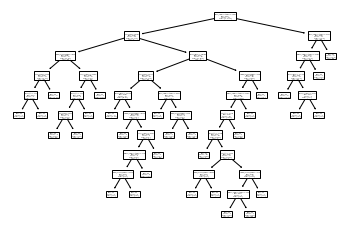

In [32]:
# Árbol sin restricciones de profundidad ni ccp_alpha
aux = plot_tree(DecisionTreeClassifier().fit(X_train, y_train), feature_names = X.columns, class_names = Y.unique())

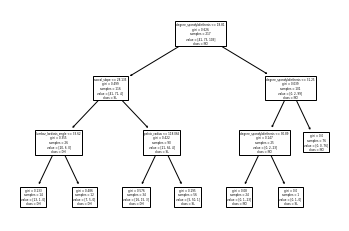

In [33]:
aux = plot_tree(DecisionTreeClassifier(max_depth = max_depths[pos]).fit(X_train, y_train), feature_names = X.columns, class_names = Y.unique())

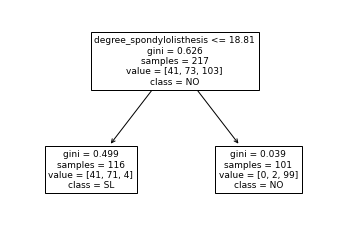

In [34]:
aux = plot_tree(DecisionTreeClassifier(max_depth = max_depths[pos1], ccp_alpha = ccp_alphas[pos2]).fit(X_train, y_train), feature_names = X.columns, class_names = Y.unique())

De los resultados anteriores, podemos extraer las siguientes conclusiones:

- El valor óptimo de la *balanced accruacy* (~78.59%) se obtiene usando el parámetro ``max_depth = 3``.
- La introducción del parámetro ``ccp_alpha`` parece reducir notablemente la *balanced accuracy* para este experimento. Del último árbol dibujado podemos razonar que esto se debe a un sesgado demasiado agresivo de los árboles generados y, en consecuencia, un esquema de toma de decisiones excesivamente sencillo.
- Si no imponemos una profundidad máxima (``max_depth = None``) obtenemos un árbol notablemente más complejo con un alto número de nodos. Esto no sólo supone una reducción de la *balanced accuracy*, sinó también un modelo más "lento" pues para clasificar una muestra se deben contrastar sus valores con un mayor número de nodos.
- Limitar la profundidad sin imponer valores para ``ccp_alpha`` parece generar un equilibrio entre árboles no demasiado profundos (evitando nodos "puros" y posiblemente *over-fitting*) y evitar un sesgado muy agresivo de los nodos.